<a href="https://colab.research.google.com/github/YoussefAli10/iris-analysis-group1/blob/main/iris_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('Hello, Iris by Youssef')

Hello, Iris by Youssef


In [ ]:
print('Hello, Iris by Sibo')

Hello, Iris by Sibo


In [ ]:
print('Hello, Iris by Wendy')

Hello, Iris by Wendy


In [ ]:
# Store basic dataset metadata
n_rows = 150
dataset_name = "Iris Dataset"

print(f"Dataset: {dataset_name}")
print(f"Number of rows: {n_rows}")


Dataset: Iris Dataset
Number of rows: 150


In [ ]:
# Example: check petal length threshold
petal_length = 1.7
if petal_length > 1.5:
    print("Large petal")
else:
    print("Small petal")


Large petal


In [ ]:
def classify_flower(sepal_length, petal_length):
    """
    Returns a label 'small'/'medium'/'large' based on petal_length.
    (Simple thresholds for demo; not a trained model.)
    """
    if petal_length < 1.5:
        return "small"
    elif petal_length < 4.5:
        return "medium"
    else:
        return "large"

# quick sanity checks
print(classify_flower(5.1, 1.4))  # small
print(classify_flower(6.0, 3.5))  # medium
print(classify_flower(6.3, 5.0))  # large


small
medium
large


In [ ]:
# Iterate through Iris species and print them
species = ["setosa", "versicolor", "virginica"]
for s in species:
    print(s)


setosa
versicolor
virginica


In [62]:
# To grab the dataset
from google.colab import files
upload = files.upload()

Saving iris.data to iris.data


In [63]:
import csv
import statistics
import pandas as pd

# Step 1: Define header
header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Step 2: Read raw data using csv module
with open("iris.data", "r") as f:
    reader = csv.reader(f)
    rows = [row for row in reader if len(row) == 5]  # only complete rows

In [64]:
# ------------------------
# Step 3: create summary.txt
numeric_data = {col: [] for col in header[:-1]}
for row in rows:
    for i, col in enumerate(header[:-1]):
        try:
            numeric_data[col].append(float(row[i]))
        except ValueError:
            continue

summary_csv = f"Row count: {len(rows)}\n\n"
for col, values in numeric_data.items():
    summary_csv += (
        f"Column: {col}\n"
        f"  Min: {min(values):.2f}\n"
        f"  Max: {max(values):.2f}\n"
        f"  Mean: {statistics.mean(values):.2f}\n\n"
    )

with open('summary.txt', 'w') as f:
    f.write(summary_csv)

print("Summary.txt created")


Summary.txt created


In [66]:

# Step 1: Load the raw CSV with header names
header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv("iris.data", header=None, names=header)

# Step 2: Clean the dataset
# 1. Remove completely empty rows
df.dropna(how='all', inplace=True)

# 2. Remove duplicates
df.drop_duplicates(inplace=True)

# 3. Convert numeric columns to float (in case of string values)
for col in header[:-1]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 4. Fill missing numeric values with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Step 3: Save the cleaned dataset
df.to_csv('iris_cleaned.csv', index=False)
print("iris_cleaned.csv saved!")

iris_cleaned.csv saved!


In [68]:
numeric_cols = header[:-1]
summary_clean = f"Row count: {len(df)}\n\n"

for col in numeric_cols:
    summary_clean += (
        f"Column: {col}\n"
        f"  Min: {df[col].min():.2f}\n"
        f"  Max: {df[col].max():.2f}\n"
        f"  Mean: {df[col].mean():.2f}\n\n"
    )

with open('clean_summary.txt', 'w') as f:
    f.write(summary_clean)

print("clean_summary.txt created:")

clean_summary.txt created:


In [69]:
# Phase 4: Analysis & Visualization
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("iris_cleaned.csv")


# Display first few rows
df.head()
#to see everything
#df

#print(df.(head))
#will still print but not as nicely, becuase collab automatically displays it

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [70]:
species_list = df['species'].unique()  # gets unique species
counts = [0] * len(species_list) # initialize counts

for s in df['species']:
    for i, species in enumerate(species_list):
        if s == species:
            counts[i] += 1
#enumerate helps match each value in a row to its column name.

for species, count in zip(species_list, counts):
    print(f"{species}: {count}")

Iris-setosa: 48
Iris-versicolor: 50
Iris-virginica: 49


In [71]:
def categorize_petal_length(length):
    if length < 2:
        return "Short Petal"
    elif 2 <= length <= 5:
        return "Medium Petal"
    else:
        return "Long Petal"

df['Petal_Category'] = df['petal_length'].apply(categorize_petal_length)
df[['petal_length', 'Petal_Category']]


petal_length Petal_Category
0             1.4    Short Petal
1             1.4    Short Petal
2             1.3    Short Petal
3             1.5    Short Petal
4             1.4    Short Petal
..            ...            ...
142           5.2     Long Petal
143           5.0   Medium Petal
144           5.2     Long Petal
145           5.4     Long Petal
146           5.1     Long Petal

[147 rows x 2 columns]

In [73]:
stats = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].agg(['mean', 'median', 'min', 'max'])
stats



sepal_length  sepal_width  petal_length  petal_width
mean        5.856463     3.055782      3.780272     1.208844
median      5.800000     3.000000      4.400000     1.300000
min         4.300000     2.000000      1.000000     0.100000
max         7.900000     4.400000      6.900000     2.500000

In [74]:
group_stats = df.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()
group_stats

sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa          5.010417     3.431250      1.462500     0.250000
Iris-versicolor      5.936000     2.770000      4.260000     1.326000
Iris-virginica       6.604082     2.979592      5.561224     2.028571

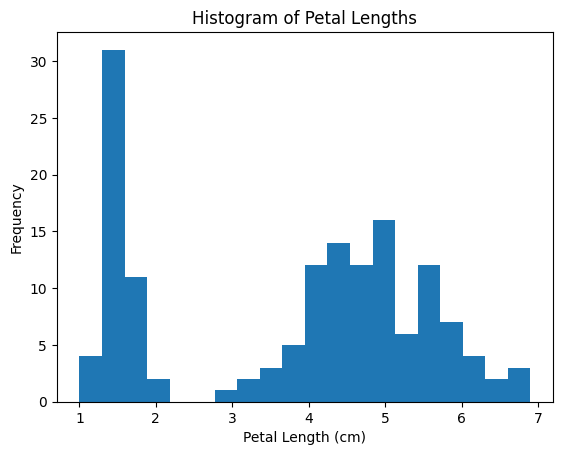

In [75]:
plt.hist(df['petal_length'], bins=20)
plt.title("Histogram of Petal Lengths")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.show()


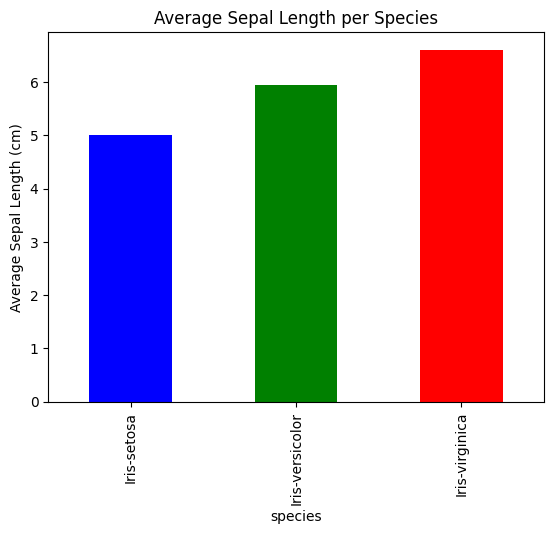

In [76]:
avg_sepal = df.groupby('species')['sepal_length'].mean()
avg_sepal.plot (kind='bar', color=['blue', 'green', 'red'])
plt.title("Average Sepal Length per Species")
plt.ylabel("Average Sepal Length (cm)")
plt.show()


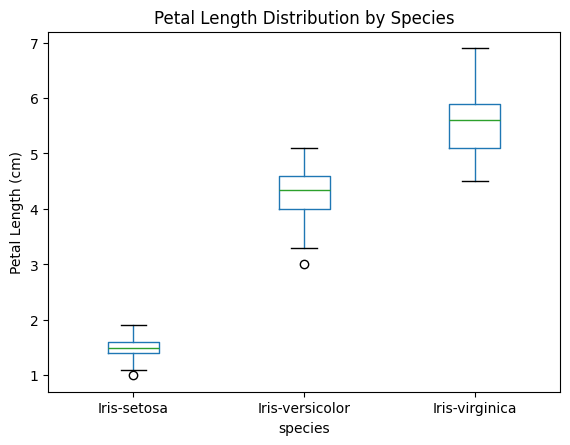

In [77]:
df.boxplot(column='petal_length', by='species', grid=False)
plt.title("Petal Length Distribution by Species")
plt.suptitle("")
plt.ylabel("Petal Length (cm)")
plt.show()


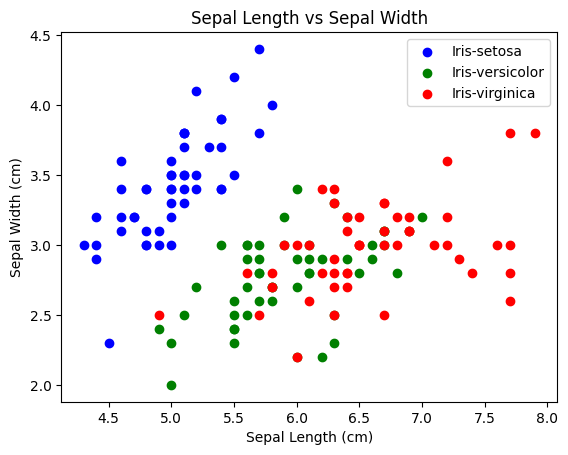

In [78]:
colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'}

for species, color in colors.items():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=species, color=color)

plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.show()


In [79]:
df.to_csv("iris_classes.csv", index=False)
print(" iris_classes.csv created successfully!")


 iris_classes.csv created successfully!
